<a href="https://colab.research.google.com/github/harikrishna-au/AU-NEEDZ/blob/main/Exploratory_Data_Analysis_on_Iris_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicates in the dataset:  0


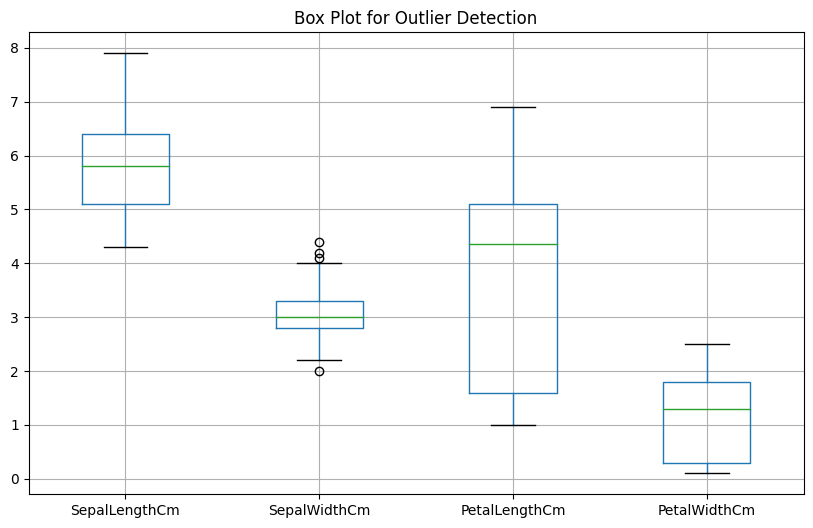

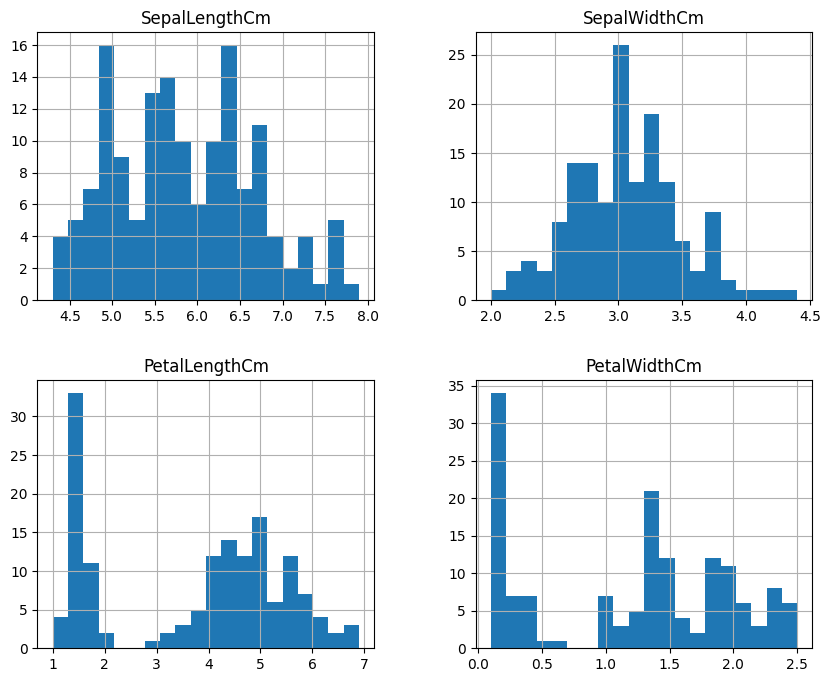

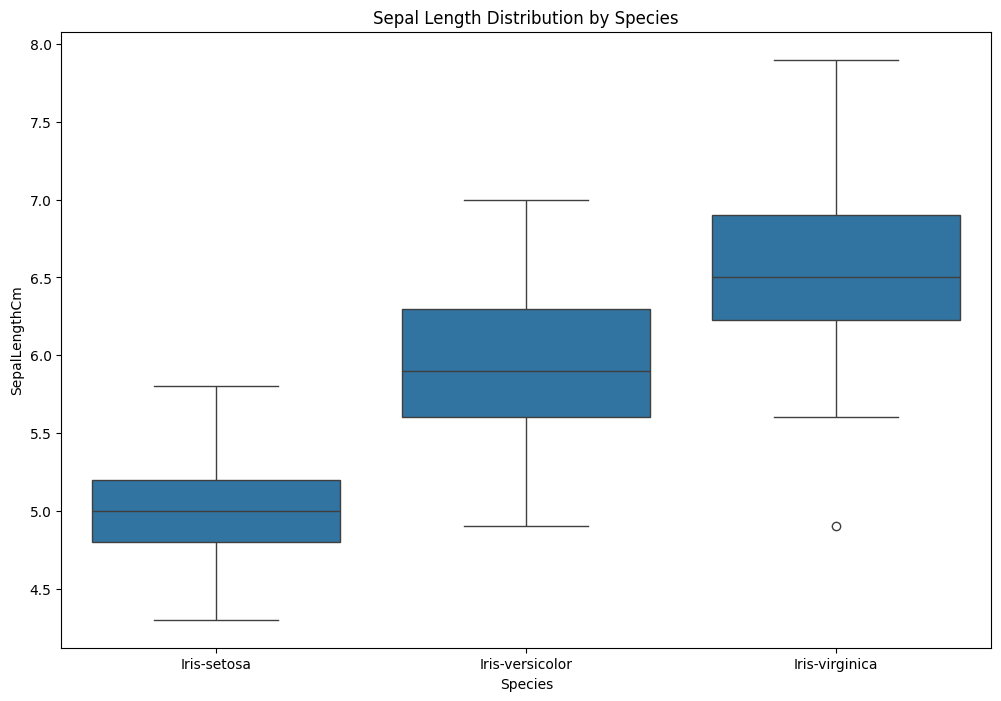

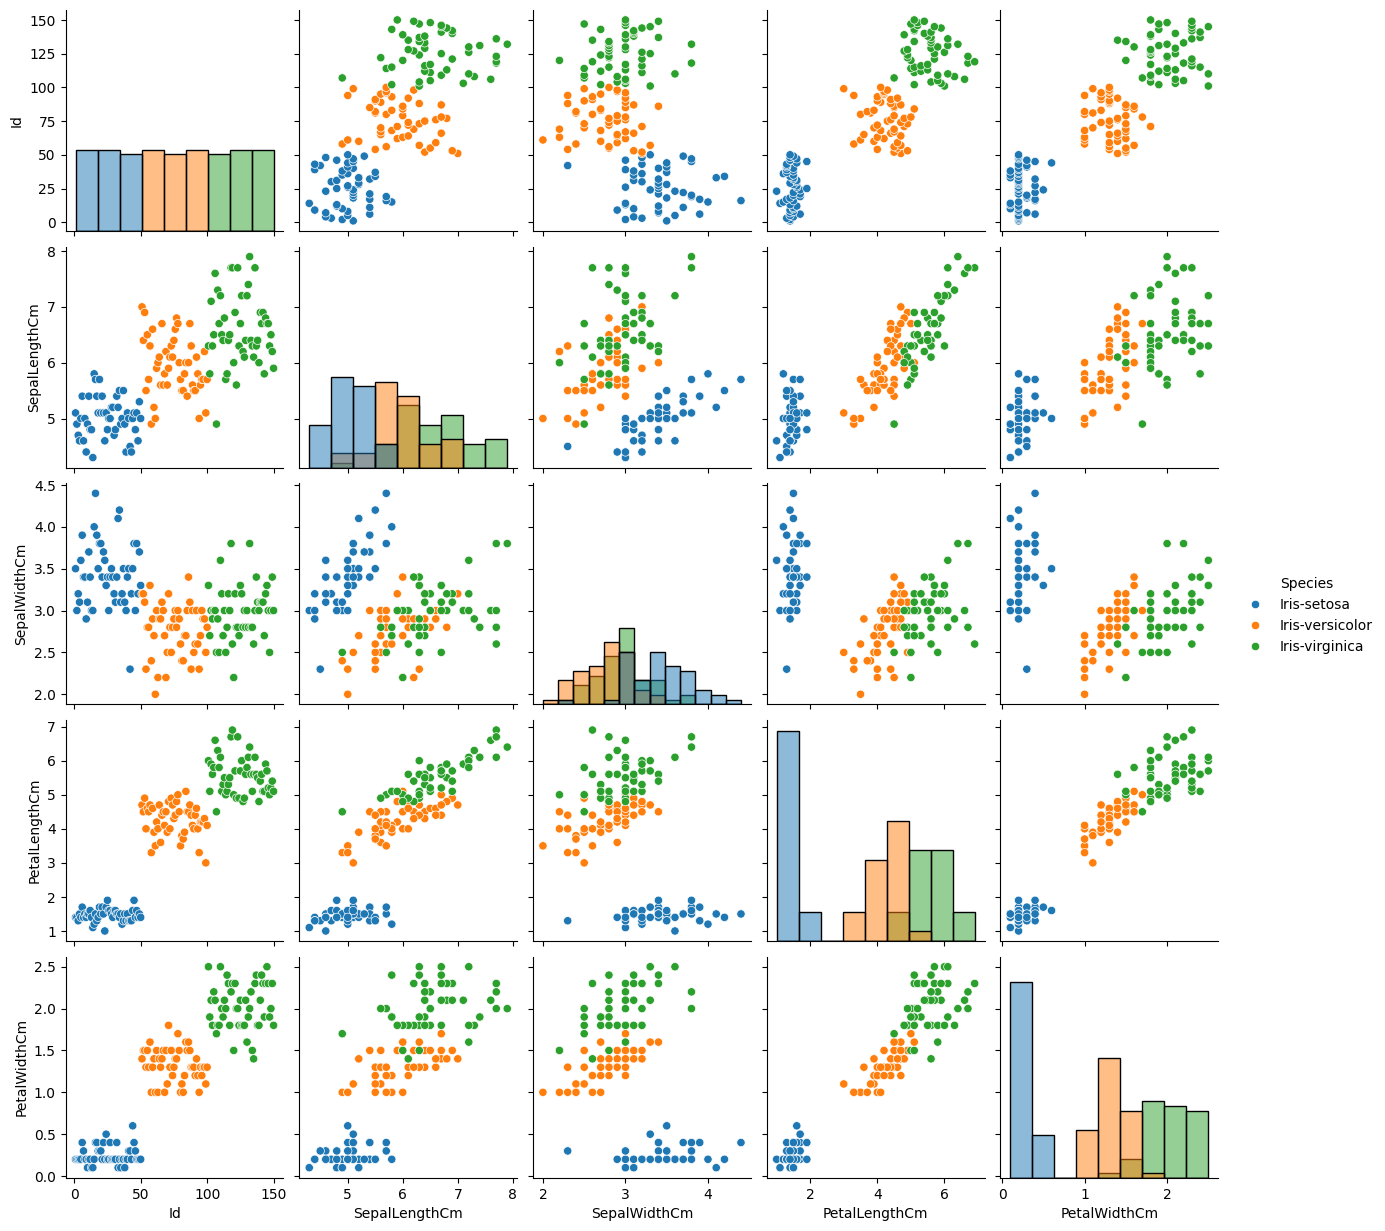

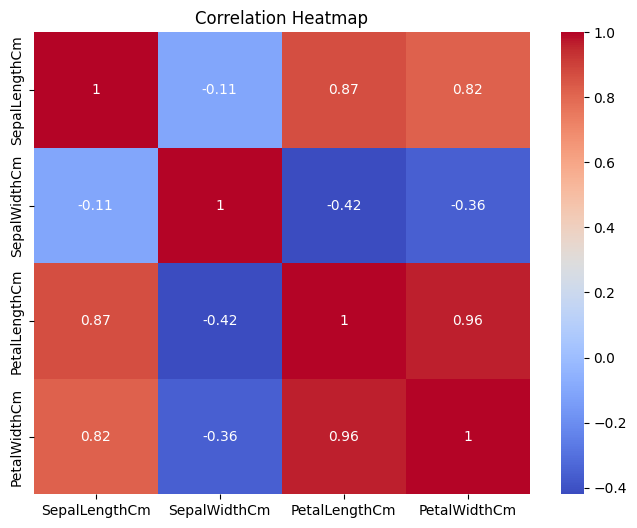

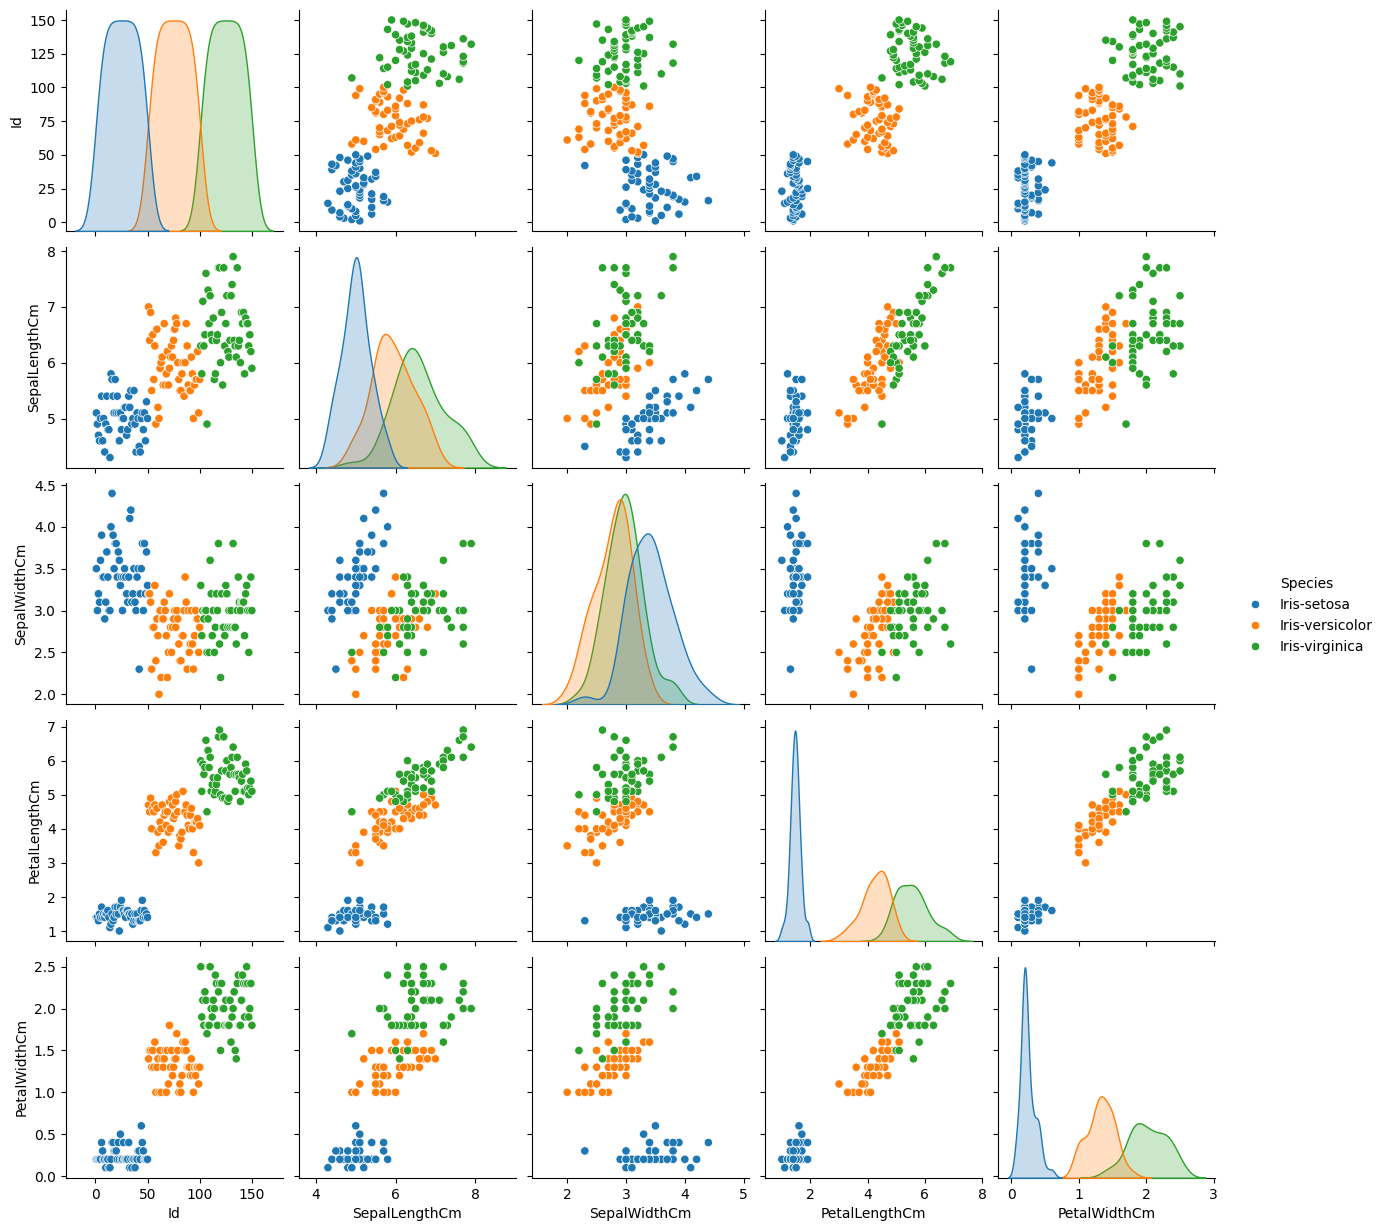


Descriptive Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20240923162510/Iris.csv')

# Data Cleaning and Preprocessing
print("Missing values:")
print(df.isnull().sum())

print("\nDuplicates in the dataset: ", df.duplicated().sum())
df = df.drop_duplicates()

numerical_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

plt.figure(figsize=(10,6))
df[numerical_columns].boxplot()
plt.title('Box Plot for Outlier Detection')
plt.show()

# Data Visualization
df[numerical_columns].hist(figsize=(10,8), bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()

sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()

# Summary Statistics
print("\nDescriptive Statistics:")
print(df.describe())

print("\nCorrelation Matrix:")
print(df[numerical_columns].corr())

# Insights and Interpretation
grouped = df.groupby('Species').mean()
print("\nMean Values by Species:")
print(grouped)

print("Recommendations:")
print("1. Sepal length and petal length are the most distinguishing features between species.")
print("2. Versicolor and Virginica species have overlapping features, making them harder to classify.")
print("3. Consider using dimensionality reduction techniques (e.g., PCA) to improve model performance.")